In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from bitalg.tests.test3 import Test
from bitalg.visualizer.main import Visualizer

# Triangulacja wielokątów monotonicznych - problem monitorowania galerii


## Przydatne funkcje


In [2]:
polygon_example_1 = [(5,5), (3,4), (6,3), (4,2), (6,0), (7,1), (8,4)]
polygon_example_2 = [(2,0), (5,1), (6,0), (8,3), (7,2), (8,7), (6,9), (5,8), (2,9), (1,7), (2,4), (4,5), (3,6), (5, 7), (5.5, 3), (2,2), (1,3), (0,1)]
polygon_example_colors = [1, 3, 1, 0, 2, 4, 0, 2, 0, 4, 1, 4, 4, 3, 4, 2, 0, 4]
polygon_example_tri = [(polygon_example_1[0], polygon_example_1[2]),
                      (polygon_example_1[2], polygon_example_1[5]),
                      (polygon_example_1[2], polygon_example_1[6]),
                      (polygon_example_1[2], polygon_example_1[4])]

In [3]:
def draw_polygon(polygon):
    vis = Visualizer()
    points = polygon
    vis.add_polygon(polygon, fill=False)
    vis.show()

In [4]:
def draw_polygon_colors(polygon,colors):
    points_start=[]
    points_end=[]
    points_connect=[]
    points_divide=[]
    points_regular=[]
    for i in range(len(polygon)):
        if colors[i]==0:
            points_start.append(polygon[i])
        elif colors[i]==1:
            points_end.append(polygon[i])
        elif colors[i]==2:
            points_connect.append(polygon[i])
        elif colors[i]==3:
            points_divide.append(polygon[i])
        elif colors[i]==4:
            points_regular.append(polygon[i])

    vis = Visualizer()
    colors_start = ['green']
    color_end=['red']
    color_connect=['blue']
    color_divide=['cyan']
    color_regular=['#3B240B']
    vis.add_polygon(polygon, fill=False)
    vis.add_point(points_start, color=colors_start)
    vis.add_point(points_end, color=color_end)
    vis.add_point(points_connect, color=color_connect)
    vis.add_point(points_divide, color=color_divide)
    vis.add_point(points_regular, color=color_regular)
    vis.show()

In [5]:
def draw_polygon_tri(polygon,tri):

    vis = Visualizer()
    points = polygon
    tri_line_segments = tri
    vis.add_polygon(points, fill=False)
    vis.add_point(points)
    vis.add_line_segment(tri_line_segments, color='red')
    vis.show()

## Wprowadzenie
Celem ćwiczenia jest:
- sprawdzanie $y$-monotoniczności
- podział wierchołków na kategorie
- triangulacja wielokąta monotonicznego

### Przykładowy wielokąt $y$-monotoniczny

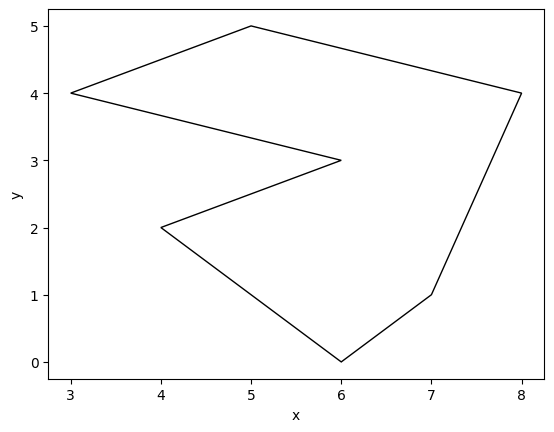

In [6]:
draw_polygon(polygon_example_1)

Do tego celu wygeneruj wielokąt.

In [7]:
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText

def draw_shape(i:int = 1):
    points = []

    def onclick(event):
        if event.button == 1: # left click
            x, y = event.xdata, event.ydata
            points.append((x,y))
            plt.plot(x,y,'bo')
            plt.draw()

        elif event.button == 3 and len(points) > 2: # right click
            polygon_points = points + [points[0]]
            xs, ys = zip(*polygon_points)
            plt.plot(xs,ys, 'b-')
            plt.draw()

    def on_key(event):

        if event.key == ' ':
            plt.close(fig)

        elif event.key == 'r':
            points.clear()
            plt.cla()
            ax.set_title(f'Polygon {i}')
            ax.set_xlim(0,10)
            ax.set_ylim(0,10)
            add_instructions(ax)
            plt.draw()

    def add_instructions(ax):
        instructions = 'Left click to add point.\nRight click to draw polygon.\n"Space" to confirm\n"r" to reset drawing.'
        text_box = AnchoredText(instructions, loc='upper left', frameon=False)
        ax.add_artist(text_box)

    fig, ax = plt.subplots()
    ax.set_title(f'Polygon {i}')
    ax.set_xlim(0,10)
    ax.set_ylim(0,10)

    add_instructions(ax)

    fig.canvas.mpl_connect('button_press_event', onclick)
    fig.canvas.mpl_connect('key_press_event', on_key)

    plt.show()
    return points

In [8]:
%matplotlib tk
n = int(input("Pass number of polygons that you want to draw"))
POLYGONS = []
for i in range(n):
    my_polygon = draw_shape(i)
    POLYGONS.append(my_polygon)
    plt.show(block = True)

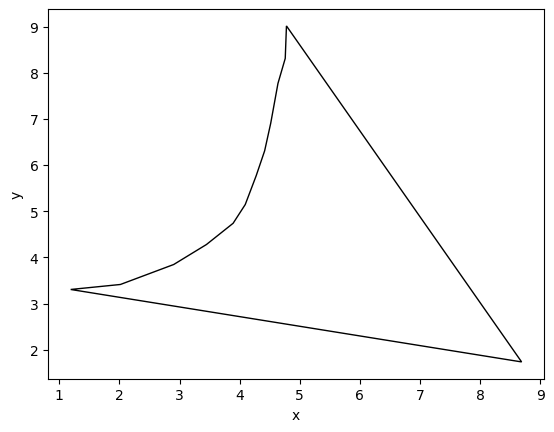

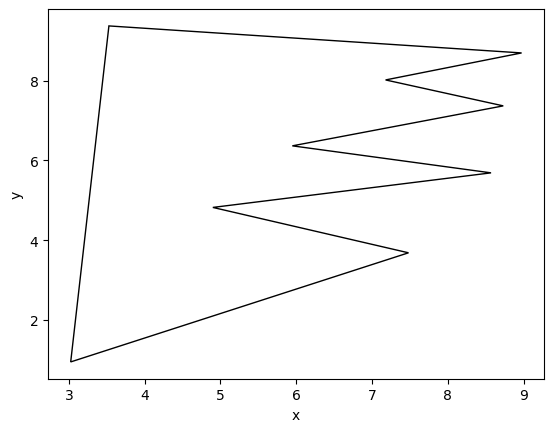

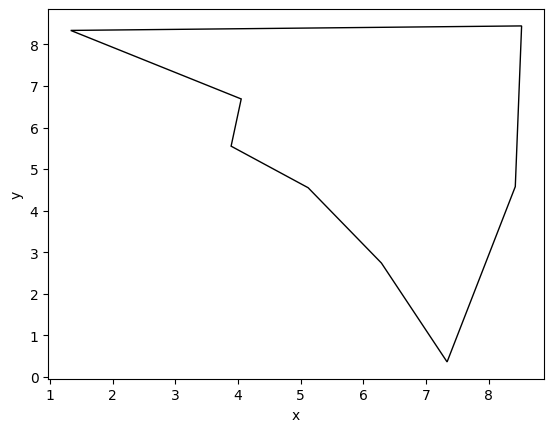

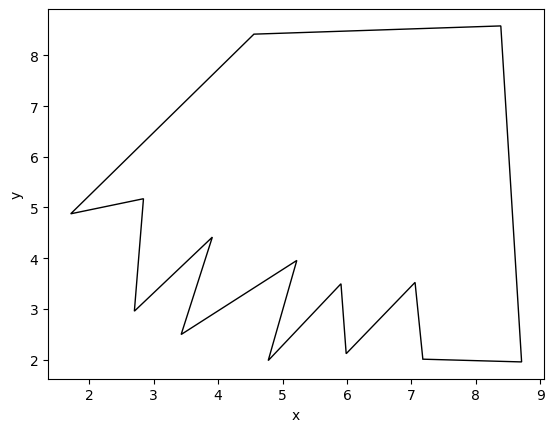

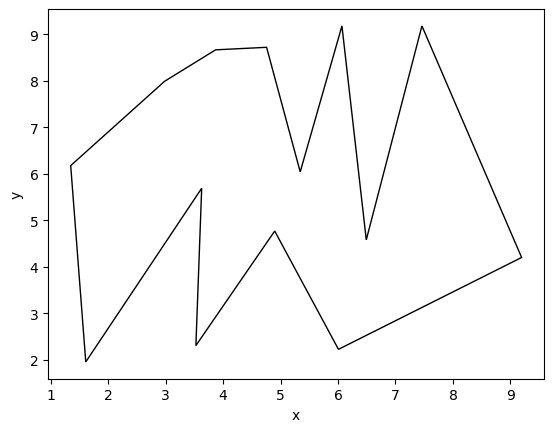

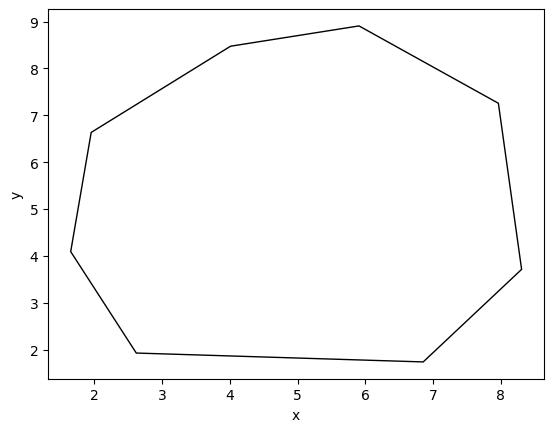

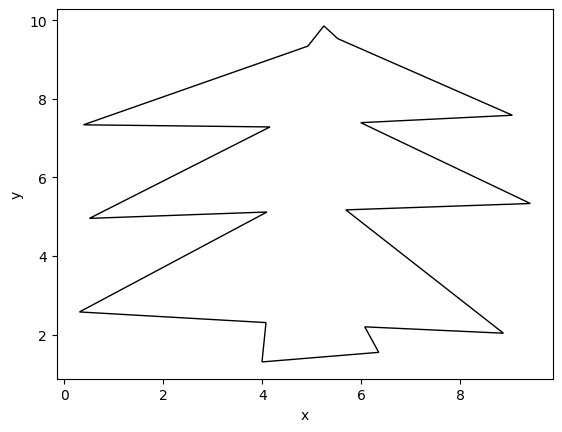

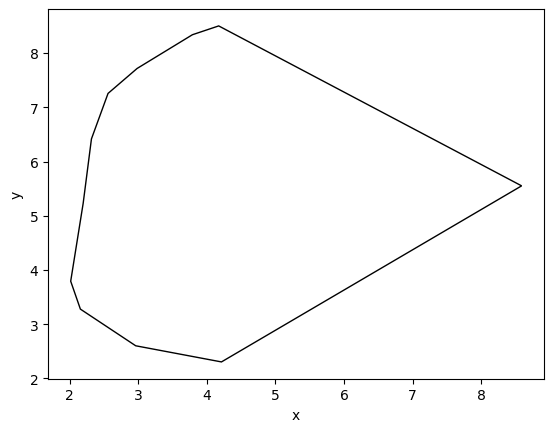

In [9]:
%matplotlib inline
for my_polygon in POLYGONS:
    draw_polygon(my_polygon)

## Czy wielokąt jest $y$-monotoniczny?

Wielokąt jest monotoniczny, gdy jego wierzchołki mogą być ułożone w taki sposób, że jedna z jego współrzędnych (na przykład współrzędna $x$ lub $y$, w zależności od układu współrzędnych) zawsze rośnie lub maleje wzdłuż kolejnych wierzchołków. Innymi słowy, dla każdej pary wierzchołków wielokąta (oprócz wierzchołka startowego i końcowego), jeden z punktów ma większą (lub mniejszą) wartość danej współrzędnej niż drugi punkt.

W praktyce, wielokąt monotoniczny może być łatwiej sortowany lub przetwarzany w pewnych algorytmach geometrycznych, ponieważ istnieje pewna kolejność, w jakiej wierzchołki pojawiają się wzdłuż danej osi (np. osi $x$ lub $y$). Monotoniczność może ułatwić znajdowanie przecięć linii w takim wielokącie lub wykonywanie innych operacji geometrycznych. W tym zadaniu interesuje nas monotoniczność wielokąta wzdłuż osi $y$.

<span style="color:red">Ćw.</span> Uzupełnij funkcję ```is_y_monotonic```. Pamiętaj, aby sprawozdanie zawierało krótki opis działania tej funkcji.

In [10]:
def find_extremes(T):
    A = []
    n = len(T)
    for i in range(n): A.append((T[i][0], T[i][1], i))
    return (min(A, key = lambda p: (p[1],p[0])), max(A, key = lambda p: (p[1],p[0])))

In [11]:
def split_polygon(P):
    """
    Funkcja dzieli wielokąt P na dwa zbiory punktów, lewy i prawy łańcuch patrząc od najbardziej wysuniętego
    punktu do góry do najniższego. Przy czym najniższy punkt należy do prawego łańcucha, a najwyższy do lewego.
    :param P: tablica krotek punktów na płaszczyźnie euklidesowej
    :return: dwie tablice krotek punktów i ich indeksów, lewy i prawy łańcuch
    """
    n = len(P)
    mini, maxi = find_extremes(P)
    min_ind, max_ind = mini[2], maxi[2]
    left_side = []
    right_side = []

    if min_ind < max_ind:
        for i in range(max_ind - 1, min_ind - 1, -1):
            right_side.append((P[i],i))
        for i in range(max_ind,n):
            left_side.append((P[i],i))
        for i in range(min_ind):
            left_side.append((P[i],i))
    else:
        for i in range(max_ind, min_ind):
            left_side.append((P[i],i))
        for i in range(max_ind-1, -1 , -1):
            right_side.append((P[i],i))
        for i in range(n-1, min_ind-1, -1):
            right_side.append((P[i],i))
    # min point belongs to right_side
    # max point belongs to left_side
    return left_side, right_side

In [12]:
def is_y_monotonic(polygon):
    """
    Funkcja określa czy podana figura jest y-monotoniczna.
    :param polygon: tablica krotek punktów na płaszczyźnie euklidesowej podanych przeciwnie do ruchu wskazówek zegara - nasz wielokąt
    :return: wartość bool - true, jeśli wielokąt jest monotoniczny i false jeśli nie jest
    """

    left_side, right_side = split_polygon(polygon)
    l, r = len(left_side), len(right_side)
    for i in range(l-1):
        if left_side[i][0][1] < left_side[i+1][0][1]: return False
    for i in range(r-1):
        if right_side[i][0][1] < right_side[i+1][0][1]: return False
    return True

Przeprowadź test poprawności powyższej funkcji.

In [13]:
Test().runtest(1, is_y_monotonic)

Lab 3, task 1:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
	Test 4: Passed
	Test 5: Passed
	Test 6: Passed
	Test 7: Passed
	Test 8: Passed
	Test 9: Passed
	Test 10: Passed
Result: 10/10
Time: 0.001s


Sprawdź monotoniczność swojego wielokątu.

In [14]:
n = len(POLYGONS)
for i in range(n):
    print(f'Polygon {i}: {is_y_monotonic(POLYGONS[i])}')

Polygon 0: True
Polygon 1: True
Polygon 2: True
Polygon 3: False
Polygon 4: False
Polygon 5: True
Polygon 6: False
Polygon 7: True


***

# Podział wierzchołków na kategorie

Wierzchołki naszego wielokąta możemy podzielić na parę kategorii:
- początkowe, gdy obaj jego sąsiedzi leżą poniżej i kąt wewnętrzny ma mniej niż 180 stopni. To wierzchołki, w których zaczyna się monotoniczny spadek
- końcowe, gdy obaj jego sąsiedzi leżą powyżej i kąt wewnętrzny ma mniej niż 180 stopni. To wierzchołki, w których monotoniczność wielokąta się zmienia, czyli na przykład zaczyna się monotoniczny wzrost, jeśli wcześniej był spadek, lub na odwrót.

Wierzchołki startowe i końcowe są ważne w kontekście algorytmów przetwarzania wielokątów monotonicznych, takich jak algorytmy dziel i zwyciężaj oraz triangulacji.
- dzielący, gdy obaj jego sąsiedzi leżą poniżej i kąt wewnęntrzny ma więcej niż 180 stopni. To wierzchołki, które wyznaczają przekątne (linie łączące), tworzące trójkąty podczas triangulacji.
- łączący, gdy obaj jego sąsiedzi leżą powyżej i kąt wewnęntrzny ma więcej niż 180 stopni. To wierzchołki, które są połączone liniami (przekątnymi) wewnątrz wielokąta, tworząc trójkąty.

Wierzchołki łączące i dzielące odgrywają kluczową rolę w procesie triangulacji wielokątów, pozwalając na podział figury na trójkąty w sposób bezkolizyjny.
- prawidłowy, pozostałe przypadki, jeden sąsiad powyżej, drugi poniżej


### Przykładowy wielokąt z pokolorowanymi wierzchołkami.

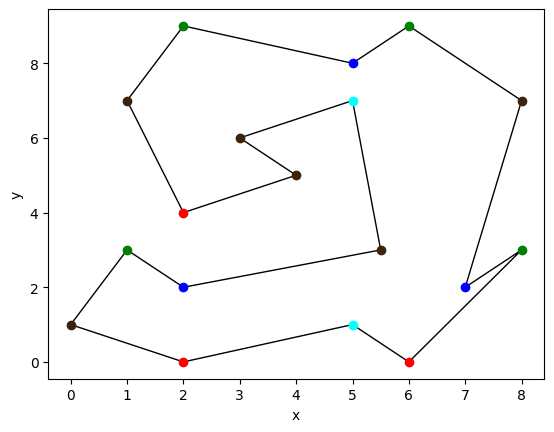

In [15]:
draw_polygon_colors(polygon_example_2,polygon_example_colors)

<span style="color:red">Ćw.</span> Uzupełnij funkcję ```color_vertex``` .

In [16]:
def orient(a,b,c):
    """
    Funkcja określa skręt układu punktów a,b,c

    orient (a,b,c) > 0 układ jest lewoskrętny
    
    orient (a,b,c) < 0 układ jest prawoskrętny
    """
    import numpy as np
    ax, ay = a
    bx, by = b
    cx, cy = c
    matrix = np.array([
        [ax, ay, 1],
        [bx, by, 1],
        [cx, cy, 1]
    ])
    return np.linalg.det(matrix)

In [17]:
def color_vertex(polygon):
    """
    Funkcja dzieli wierzchołki na kategorie i przypisuje wierzchołkom odpowiednie numery: 0 - początkowy, 1 - końcowy, 2 - łączący, 3 - dzielący, 4 - prawdiłowy
    :param polygon: tablica krotek punktów na płaszczyźnie euklidesowej podanych przeciwnie do ruchu wskazówek zegara - nasz wielokąt
    :return: tablica o długości n, gdzie n = len(polygon), zawierająca cyfry z przedziału 0 - 4, gdzie T[i] odpowiada kategorii i-tego wierzchołka.
    """
    n = len(polygon)
    categorized_points = [None] * n

    for i in range(n):
        previous = polygon[i-1]
        considered= polygon[i]
        next= polygon[(i+1)%n]

        px, py = previous
        cx, cy = considered
        nx, ny = next

        orient_result = orient(previous, considered, next)

        if py < cy and ny < cy:
            if orient_result > 0: categorized_points[i] = 0
            elif orient_result < 0: categorized_points[i] = 3

        elif py > cy and ny > cy:
            if orient_result < 0: categorized_points[i] = 2
            elif orient_result > 0: categorized_points[i] = 1
        
        else: categorized_points[i] = 4

    return categorized_points
    

Przeprowadź test poprawności powyższej funkcji. 

In [18]:
Test().runtest(2, color_vertex)

Lab 3, task 2:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
	Test 4: Passed
	Test 5: Passed
	Test 6: Passed
	Test 7: Passed
	Test 8: Passed
	Test 9: Passed
	Test 10: Passed
Result: 10/10
Time: 0.004s


Zwizualizuj swój wielokąt z pokolorowanymi według kategorii wierzchołkami.

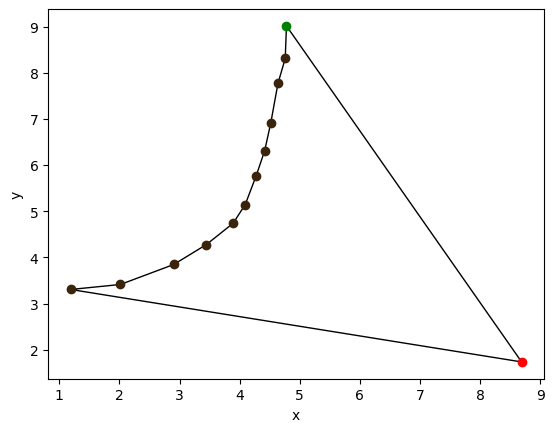

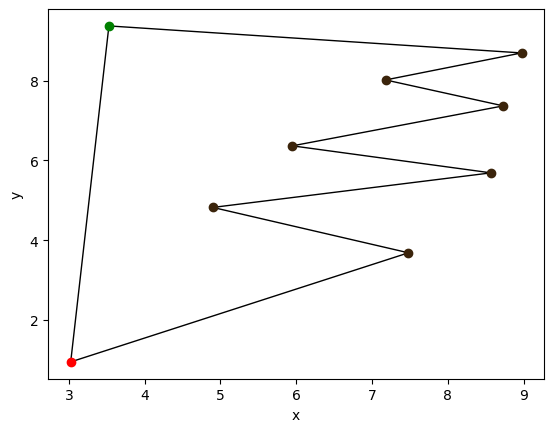

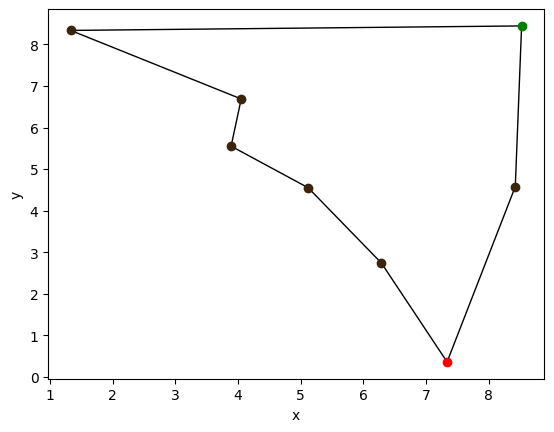

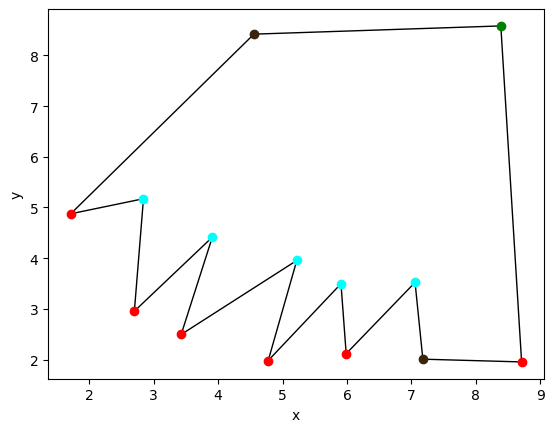

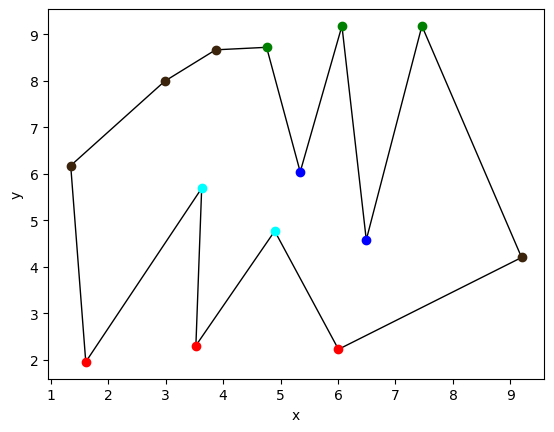

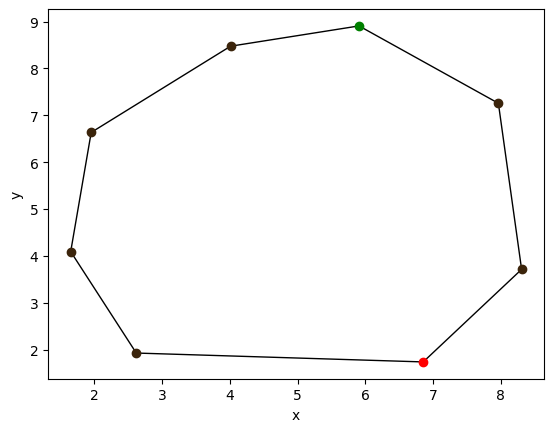

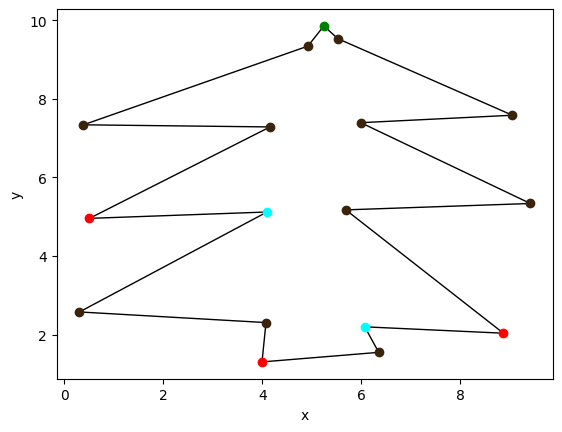

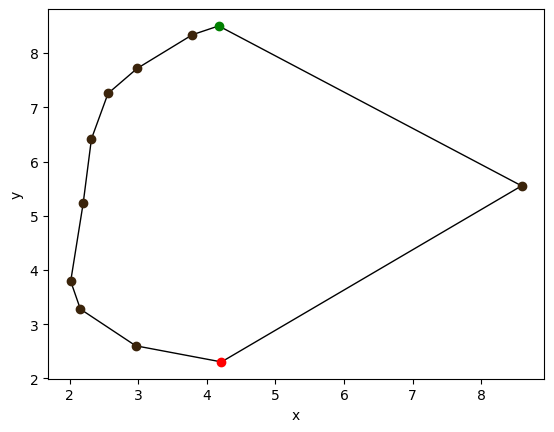

In [19]:
n = len(POLYGONS)
for i in range(n):
    colors = color_vertex(POLYGONS[i])
    draw_polygon_colors(POLYGONS[i], colors)

***

# Triangulacja wielokąta monotonicznego

Triangulacja wielokąta monotonicznego to proces podziału wielokąta monotonicznego na trójkąty poprzez dodawanie przekątnych (linii łączących wierzchołki), które nie przecinają się wewnętrznie.

### Przykładowy wielokąt podzielony na trójkąty.

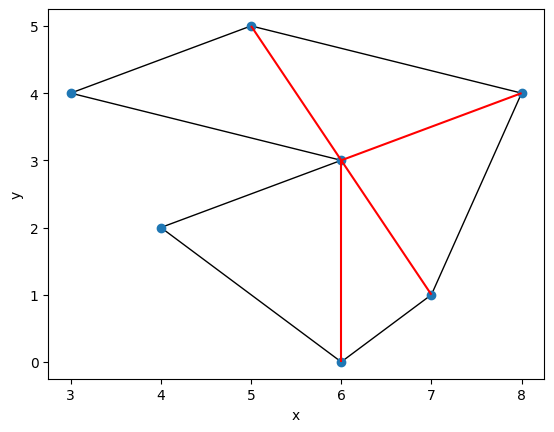

In [20]:
draw_polygon_tri(polygon_example_1, polygon_example_tri)

<span style="color:red">Ćw.</span> Uzupełnij funkcję ```triangulation```. Wykorzystaj algorytm opisany na wykładzie.

In [21]:
def organize_points(L,R):
    l, r = len(L), len(R)
    A = []
    i = j = 0
    while i < l and j < r:
        if L[i][0][1] > R[j][0][1]:
            A.append((L[i][0], L[i][1]))
            i += 1
        else:
            A.append((R[j][0], R[j][1]))
            j += 1
    
    while j < r:
        A.append((R[j][0], R[j][1]))
        j += 1
    while i < l:
        A.append((L[i][0], L[i][1]))
        i += 1
    return A

In [22]:
def correct_triangle(a,b,c, side):
    if side == 'L':
        return orient(a,b,c) > 0
    elif side == 'R':
        return orient(a,b,c) < 0

In [23]:
def triangulation(polygon):
    """
    Funkcja dokonuje triangulacji wielokąta monotonicznego.
    :param polygon: tablica krotek punktów na płaszczyźnie euklidesowej podanych przeciwnie do ruchu wskazówek zegara - nasz wielokąt
    :return: tablica krotek dodawanych po kolei przekątnych np: [(1,5),(2,3)], oznacza, że triangulacja polega na dodaniu przekątnej pomiędzy wierzchołki o indeksach 1 i 5 oraz 2 i 3
    """
    if not is_y_monotonic(polygon): return polygon
    
    n = len(polygon)
    left_side, right_side = split_polygon(polygon)
    m_points = organize_points(left_side, right_side)

    left_indexes = set(map(lambda x: x[1], left_side))
    _right_indexes = set(map(lambda x: x[1], right_side))

    STACK = [m_points[0], m_points[1]]
    connect = []

    for i in range(2,n):
        prev_point, prev_index = STACK[-1]
        curr_point, curr_index = m_points[i]

        prev_position = 'L' if prev_index in left_indexes else 'R'
        curr_position = 'L' if curr_index in left_indexes else 'R'
        
        if prev_position == curr_position:
            m = len(STACK)
            for j in range(m-2,-1,-1):
                point, index = STACK[j]
                if correct_triangle(point, STACK[-1][0], curr_point, curr_position) and (abs(curr_index - STACK[j][1]) not in (1,n-1)):
                    connect.append((curr_index, index))
                    STACK.pop()

        else:
            for point, index in STACK:
                if abs(curr_index - index) not in (1,n-1):
                    connect.append((curr_index, index))
            STACK = [STACK[-1]]

        STACK.append(m_points[i])

    return connect

Przeprowadź testy poprawności powyższej funkcji.


In [24]:
Test().runtest(3, triangulation)

Lab 3, task 3:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
	Test 4: Passed
	Test 5: Passed
	Test 6: Passed
	Test 7: Passed
	Test 8: Passed
	Test 9: Passed
	Test 10: Passed
Result: 10/10
Time: 0.003s


In [25]:
def triangulation_gif(polygon):
    """
    Funkcja dokonuje triangulacji wielokąta monotonicznego.
    :param polygon: tablica krotek punktów na płaszczyźnie euklidesowej podanych przeciwnie do ruchu wskazówek zegara - nasz wielokąt
    :return: tablica krotek dodawanych po kolei przekątnych np: [(1,5),(2,3)], oznacza, że triangulacja polega na dodaniu przekątnej pomiędzy wierzchołki o indeksach 1 i 5 oraz 2 i 3
    """
    if not is_y_monotonic(polygon): return []
    vis = Visualizer()
    vis.add_polygon(polygon, fill = False)

    n = len(polygon)
    left_side, right_side = split_polygon(polygon)
    m_points = organize_points(left_side, right_side)

    left_indexes = set(map(lambda x: x[1], left_side))
    _right_indexes = set(map(lambda x: x[1], right_side))

    STACK = [m_points[0], m_points[1]]
    points_on_stack = [vis.add_point(m_points[0][0], color = 'blue'),vis.add_point(m_points[1][0], color = 'blue')]
    connect = []

    for i in range(2,n):
        prev_point, prev_index = STACK[-1]
        curr_point, curr_index = m_points[i]

        considered_point = vis.add_point(curr_point, color = 'cyan')

        prev_position = 'L' if prev_index in left_indexes else 'R'
        curr_position = 'L' if curr_index in left_indexes else 'R'
        
        if prev_position == curr_position:
            m = len(STACK)
            for j in range(m-2,-1,-1):
                point, index = STACK[j]
                if correct_triangle(point, STACK[-1][0], curr_point, curr_position) and (abs(curr_index - STACK[j][1]) not in (1,n-1)):
                    connect.append((curr_index, index))
                    vis.add_line_segment((curr_point, point), color = 'red')
                    STACK.pop()
                    vis.remove_figure(points_on_stack.pop())

        else:
            for point, index in STACK:
                if abs(curr_index - index) not in (1,n-1):
                    connect.append((curr_index, index))
                    vis.add_line_segment((curr_point, point), color = 'red')
            STACK = [STACK[-1]]
            
            for element in points_on_stack:
                vis.remove_figure(element)
            points_on_stack = [vis.add_point(STACK[-1][0], color = 'blue')]

        STACK.append(m_points[i])
        points_on_stack.append(vis.add_point(m_points[i][0], color = 'blue'))
        vis.remove_figure(considered_point)
        
    return connect, vis

Zwizualizuj powstały wielokąt podzielony na trójkąty.

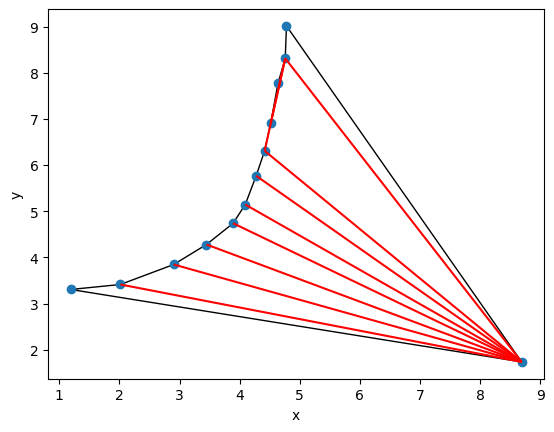

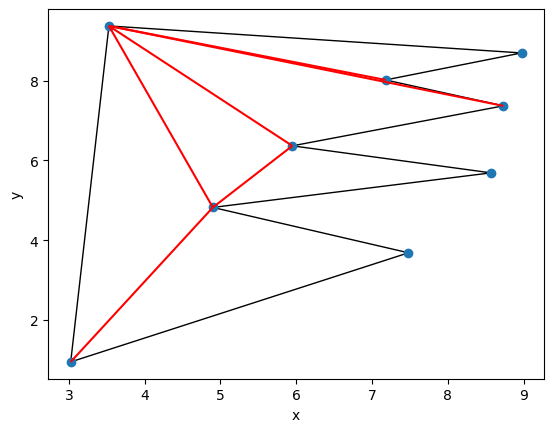

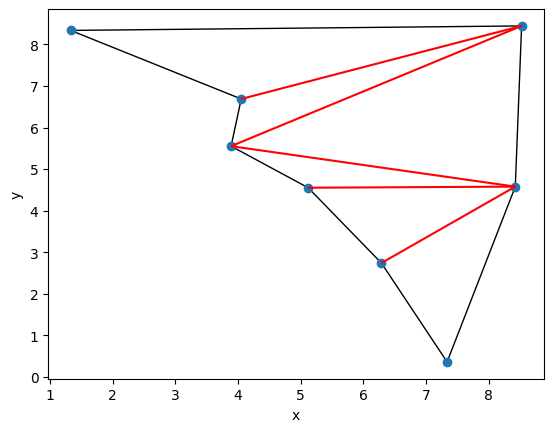

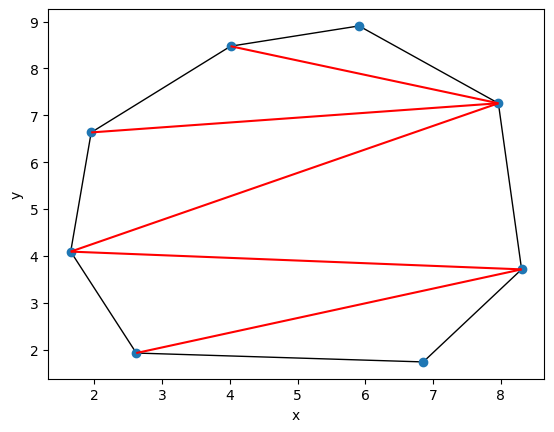

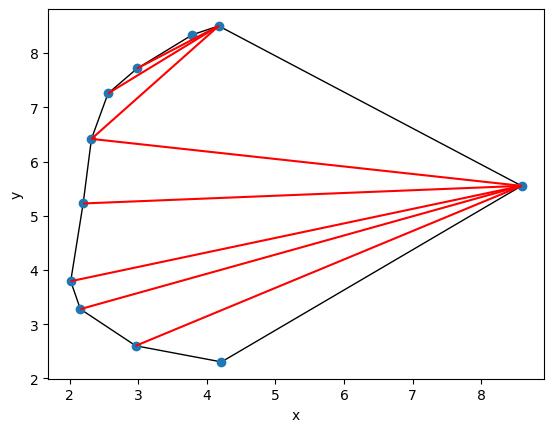

In [26]:
n = len(POLYGONS)
VISES = []
for i in range(n):
    my_polygon = POLYGONS[i]
    if not is_y_monotonic(my_polygon): continue
    tri, vis = triangulation_gif(my_polygon)
    VISES.append(vis)
    draw_polygon_tri(my_polygon, [(my_polygon[x], my_polygon[y]) for (x, y) in tri])

In [27]:
def get_whole_triangulation(polygon):
    """
    Funkcja zwraca triangulację wielokąta w postaci listy sąsiedztwa indeksów. Dla każdego indeksu punktu w liście jest lista indeksów punktów, z którymi dany punkt ma połączenie w postaci prostej.
    :param polygon: tablica krotek punktów na płaszczyźnie euklidesowej podanych przeciwnie do ruchu wskazówek zegara - nasz wielokąt
    :return: lista list indeksów, dla wielokąta zadanego jako czworokąt zgodnie ze wskazówkami zegara lista może wyglądać następująco: [[1,2],[2],[3],[0]] 
        co oznacza, że istnieje prosta między punktami o indeksach 0-1, 0-2, 1-2, 2-3, 3-0
    """
    if not is_y_monotonic(polygon): return []

    n = len(polygon)
    G = [[] for _ in range(n)]
    for i in range(n):
        G[i].append((i+1)%n)

    diagonals = triangulation(polygon)
    
    for a,b in diagonals:
        G[a].append(b)
    return G

get_whole_triangulation(POLYGONS[0])

[[1],
 [2],
 [3],
 [4, 1],
 [5, 1],
 [6],
 [7],
 [8],
 [9],
 [10],
 [11],
 [12],
 [0, 1, 4, 5, 6, 7, 8, 9, 10]]

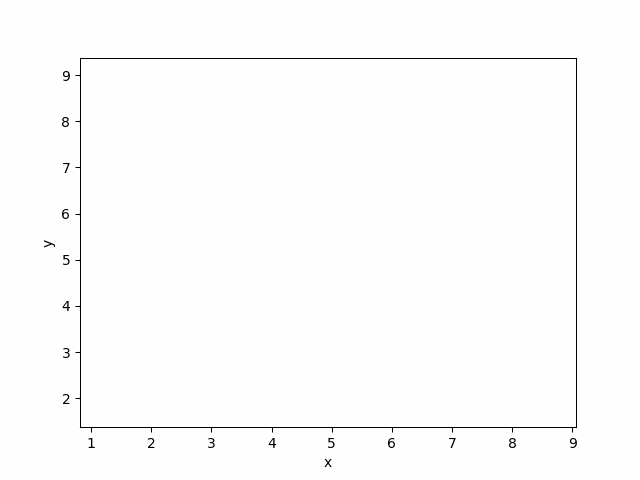

In [28]:
VISES[0].save_gif('GIFs/polygon0', interval = 700)
VISES[0].show_gif(interval = 700)

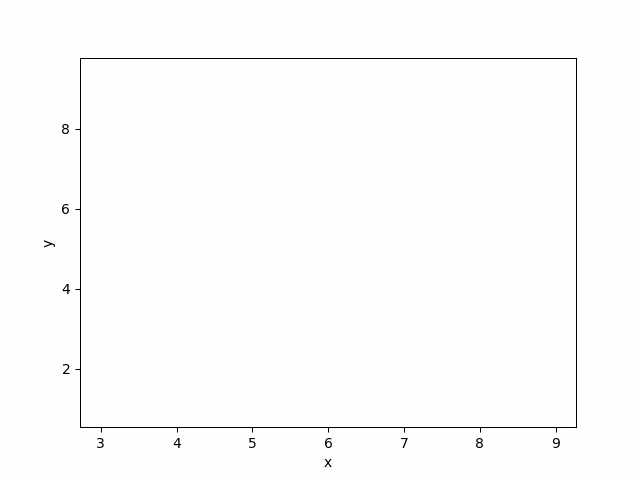

In [29]:
VISES[1].save_gif('GIFs/polygon1', interval = 700)
VISES[1].show_gif(interval = 700)

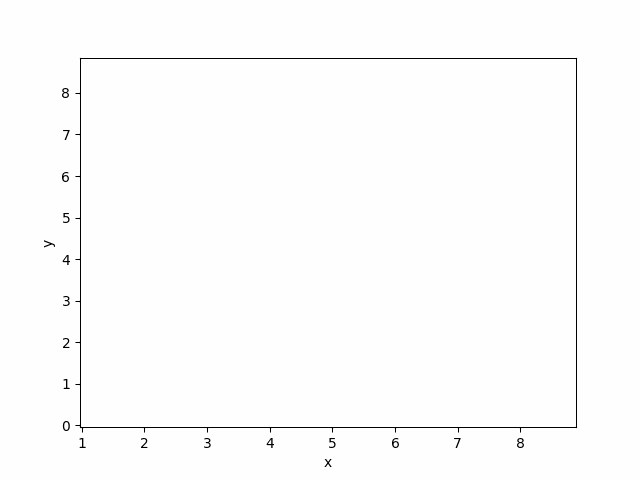

In [30]:
VISES[2].save_gif('GIFs/polygon2', interval = 700)
VISES[2].show_gif(interval = 700)

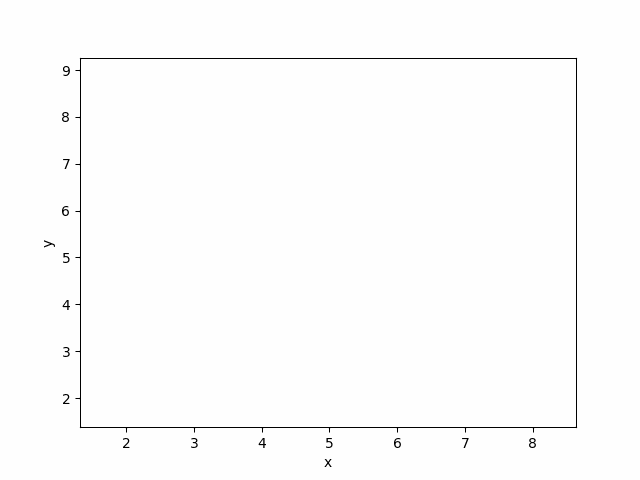

In [31]:
VISES[3].save_gif('GIFs/polygon3', interval = 700)
VISES[3].show_gif(interval = 700)

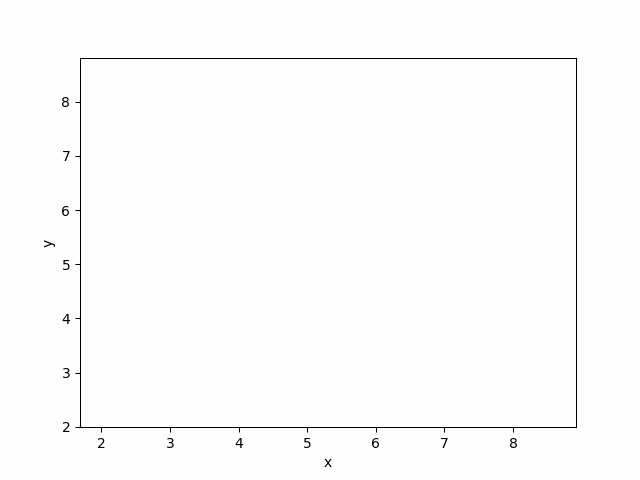

In [32]:
VISES[4].save_gif('GIFs/polygon4', interval = 700)
VISES[4].show_gif(interval = 700)